## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well as Data Visualization.**

In [4]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

## Step 2:
Data Uploading using Pandas Function


In [5]:
#Load the dataset
url = 'https://raw.githubusercontent.com/vinnithakur/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv '
df = pd.read_csv(url, sep=",")
df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
942,313.3,145.0,0.0,178.5,8.0,867.2,824.0,28,40.93
232,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,56,50.77
737,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,28,17.54
715,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90,39.66
529,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,68.75
...,...,...,...,...,...,...,...,...,...
944,153.1,145.0,113.0,178.5,8.0,1001.9,688.7,28,25.56
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,56.14
278,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,100,43.58
948,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28,26.23


## Step 3:
Doing Exploratory Data Analysis [EDA]  :-->

1. Univariate Analysis

2. Bivariate Analysis

In [6]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type' : df[i].dtype,
        'Missing Values' : df[i].isnull().sum(),
        'Unique Values' : df[i].nunique(),
        'Mode' : df[i].mode().values[0],
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Standard Deviation' : df[i].std(),
        'Kurtosis' : df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Mode,Mean,Median,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,362.600000,281.167864,272.900000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,73.895825,22.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,54.188350,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,192.000000,181.567282,185.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.204660,6.400000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,972.918932,968.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,773.580485,779.500000,80.175980,-0.102177,93.050000
7,age,int64,0,14,28.000000,45.662136,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,35.817961,34.445000,16.705742,-0.313725,22.425000


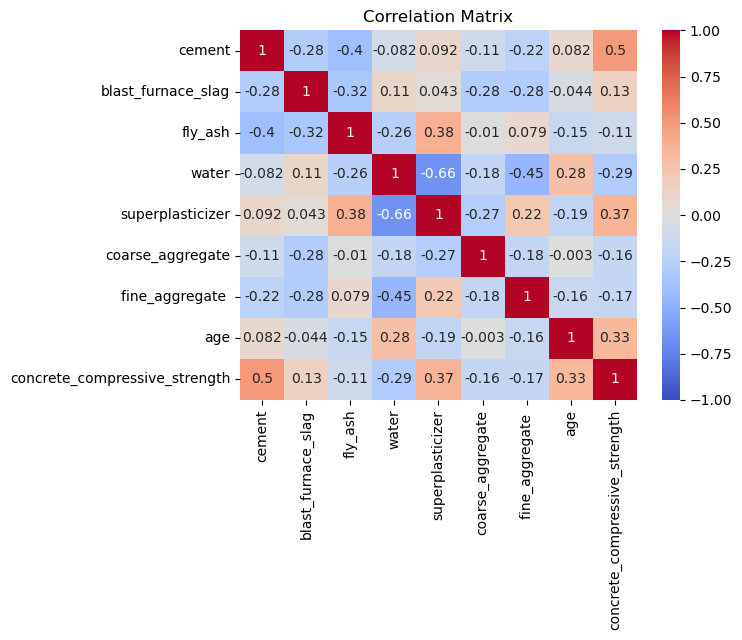

In [13]:
# Checking Correlation Matrix 
# X = Independent Variables
# y = Dependent  Variable  ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=True,center=0, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()